In [1]:
import pandas as pd
import numpy as np
import requests
import json
import os
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Step 1: Gathering the data

Below code lists the URL for two different API endpoints, the Legacy Pagecounts API and the Pageviews API containing wikipedia traffic from 2008-2020 which will be used for this assignment.

In [2]:
# URL for legacy pagecounts
legacy_mobile_site = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/en.wikipedia.org/mobile-site/monthly/2008010100/2016070100'
legacy_desktop_site = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/en.wikipedia.org/desktop-site/monthly/2008010100/2016070100'

# URL for pageviews
pageview_desktop_site = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/desktop/user/monthly/2015060100/2020100100'
pageview_mobile_web_site = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/mobile-web/user/monthly/2015060100/2020100100'
pageview_mobile_app_site = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/mobile-app/user/monthly/2015060100/2020100100'

The below code accesses the above URLs using the 'request' API library and the resulting raw data is saved into 5 seperate JSON files using the 'apiname_accesstype_firstmonth-lastmonth.json' naming convention.

In [3]:
# Placing a request to the legacy mobile API and storing the response in the response object 'call'
call = requests.get(legacy_mobile_site)
filename = 'pagecounts_mobile-site' + "_" + '200801' + "-" + '202008' + ".json"
# Check to see if the file already exists in the directory and delete it
if os.path.exists(filename):
    os.remove(filename)
pagecount_mobile = call.json()
# write to the new created file , save and close
with open(filename, 'w') as file:
    json.dump(pagecount_mobile,file)
# Save the data as .json for legacy pagecounts mobile site
print('Saved the file ' + filename + ' sucessfully!!')
file.close()

# Save the data as .json for legacy pagecounts desktop site
call = requests.get(legacy_desktop_site)
filename = 'pagecounts_desktop-site' + "_" + '200801' + "-" + '202008' + ".json"
if os.path.exists(filename):
    os.remove(filename)
pagecount_desktop = call.json()
with open(filename, 'w') as file:
    json.dump(pagecount_desktop,file)
print('Saved the file ' + filename + ' sucessfully!!')
file.close()

# Save the data as .json for pageviews desktop site
call = requests.get(pageview_desktop_site)
filename = 'pageviews_desktop' + "_" + '200801' + "-" + '202008' + ".json"
if os.path.exists(filename):
    os.remove(filename)
pageview_desktop = call.json()
with open(filename, 'w') as file:
    json.dump(pageview_desktop,file)
print('Saved the file ' + filename + ' sucessfully!!')
file.close()

# Save the data as .json for pageviews mobile web site
call = requests.get(pageview_mobile_web_site)
filename = 'pageviews_mobile-web' + "_" + '200801' + "-" + '202008' + ".json"
if os.path.exists(filename):
    os.remove(filename)
pageview_mobilew = call.json()
with open(filename, 'w') as file:
    json.dump(pageview_mobilew,file)
print('Saved the file ' + filename + ' sucessfully!!')
file.close()

# Save the data as .json for pageviews mobile app site
call = requests.get(pageview_mobile_app_site)
filename = 'pageviews_mobile-app' + "_" + '200801' + "-" + '202008' + ".json"
if os.path.exists(filename):
    os.remove(filename)
pageview_mobilea = call.json()
with open(filename, 'w') as file:
    json.dump(pageview_mobilea,file)
print('Saved the file ' + filename + ' sucessfully!!')
file.close()

Saved the file pagecounts_mobile-site_200801-202008.json sucessfully!!
Saved the file pagecounts_desktop-site_200801-202008.json sucessfully!!
Saved the file pageviews_desktop_200801-202008.json sucessfully!!
Saved the file pageviews_mobile-web_200801-202008.json sucessfully!!
Saved the file pageviews_mobile-app_200801-202008.json sucessfully!!


# Step 2: Processing the data

This step involves a set of processing such as combining the monthly values for mobile-app and mobile-web from Pageviews API and formatting the timestamp column to split into year and month on the 5 JSON data files prior to analysis and finally combined to form a single csv file.

In [4]:
# Function to normalize the JSON files and drop the unnecessary columns
def preprocessing_json(json_file):
    for i in range(len(json_file)):
        if i==0:
            json_file_new = pd.json_normalize(json_file['items'][0])
        else:
            json_file_new = pd.concat([json_file_new, pd.json_normalize(json_file['items'][i])])
    #Seperate 4-digit year and 2-digit month from the timestamp column
    json_file_new['year'] = [x[:4] for x in json_file_new.timestamp]
    json_file_new['month'] = [x[4:6] for x in json_file_new.timestamp]
    #drop the columns common accross all JSON files that is not required for analysis
    json_file_new = json_file_new.drop(['project','granularity','timestamp'], axis=1)
    return json_file_new

###### Read the JSON files into a dataframe for processing it

In [5]:
# Read each of the 5 JSON files for processing the data
df_pagecount_mobile =  pd.read_json('pagecounts_mobile-site_200801-202008.json')
df_pagecount_desktop =  pd.read_json('pagecounts_desktop-site_200801-202008.json')
df_pageview_desktop =  pd.read_json('pageviews_desktop_200801-202008.json')
df_pageview_mobile_web =  pd.read_json('pageviews_mobile-web_200801-202008.json')
df_pageview_mobile_app =  pd.read_json('pageviews_mobile-app_200801-202008.json')

###### Call the preprocessing_json function on each of these JSON files and further drop the column 'agent' from the Pageviews API data.

In [6]:
# Call preprocessing function on the JSON files saved from Pagecounts API data
df_pagecount_mobile = preprocessing_json(df_pagecount_mobile)
df_pagecount_desktop = preprocessing_json(df_pagecount_desktop)

# Call preprocessing function on the JSON files saved from Pageviews API data and drop the 'agent' column
df_pageview_desktop = preprocessing_json(df_pageview_desktop)
df_pageview_desktop = df_pageview_desktop.drop(['agent'], axis=1)

df_pageview_mobile_web = preprocessing_json(df_pageview_mobile_web)
df_pageview_mobile_web = df_pageview_mobile_web.drop(['agent'], axis=1)

df_pageview_mobile_app = preprocessing_json(df_pageview_mobile_app)
df_pageview_mobile_app = df_pageview_mobile_app.drop(['agent'], axis=1)

# Combine mobile app and mobile web view counts from the Pageview API
df_pageview_totalmobile = df_pageview_mobile_web.groupby(['year','month'])['views'].sum().add(df_pageview_mobile_app.groupby(['year','month'])['views'].sum()).reset_index()
df_pageview_totalmobile["access"] = 'totalmobile'
print('Values for mobile app and mobile web from the Pageview API was combined successfully!!')

Values for mobile app and mobile web from the Pageview API was combined successfully!!


###### Add zero to months without data and combine all data files into a single CSV file with the headers stated in the assignment.

In [7]:
# Combine file and add zero for months with no data
file_header = {'year':[],'month':[],'pagecount_all_views':[],'pagecount_desktop_views':[], \
                'pagecount_mobile_views':[],'pageview_all_views':[],'pageview_desktop_views':[], \
                'pageview_mobile_views':[]}

for years in range(2008, 2021):
    for months in range(1, 13):
        
        if (years==2020 and months>9):
            break
            
        if months < 10:
            month = '0' + str(months)
        else:
            month = str(months)
        year = str(years)
               
        
        # Check if the value for the month and year exists for pageview data and if not add zero
        if len(df_pageview_desktop[(df_pageview_desktop['month']==month) & (df_pageview_desktop['year'] == year)]['views']) > 0:
            pageview_desktop = df_pageview_desktop[(df_pageview_desktop['month']==month) & (df_pageview_desktop['year'] == year)]['views'].values[0]
        else:
            pageview_desktop = 0
        
        if len(df_pageview_totalmobile[(df_pageview_totalmobile['month']==month) & (df_pageview_totalmobile['year'] == year)]['views']) > 0:
            pageview_mobile = df_pageview_totalmobile[(df_pageview_totalmobile['month']==month) & (df_pageview_totalmobile['year'] == year)]['views'].values[0]
        else:
            pageview_mobile = 0
        
        # Combine the desktop and mobile counts to form the total pageview
        pageview_all = pageview_desktop + pageview_mobile
        
        # Check if the value for the month and year exists for pagecount data and if not add zero
        if len(df_pagecount_mobile[(df_pagecount_mobile['month']==month) & (df_pagecount_mobile['year'] == year)]['count']) > 0:
            pagecount_mobile = df_pagecount_mobile[(df_pagecount_mobile['month']==month) & (df_pagecount_mobile['year'] == year)]['count'].values[0]
        else:
            pagecount_mobile = 0
            
        if len(df_pagecount_desktop[(df_pagecount_desktop['month']==month) & (df_pagecount_desktop['year'] == year)]['count']) > 0:
            pagecount_desktop = df_pagecount_desktop[(df_pagecount_desktop['month']==month) & (df_pagecount_desktop['year'] == year)]['count'].values[0]
        else:
            pagecount_desktop = 0
            
        # Combine the desktop and mobile counts to form the total pagecount
        pagecount_all = pagecount_desktop + pagecount_mobile
        
        # Append the year, month and view counts for all access type
        file_header['year'].append(str(years))
        file_header['month'].append(str(months))
        file_header['pageview_all_views'].append(pageview_all)
        file_header['pageview_desktop_views'].append(pageview_desktop)
        file_header['pageview_mobile_views'].append(pageview_mobile)
        file_header['pagecount_all_views'].append(pagecount_all)
        file_header['pagecount_desktop_views'].append(pagecount_desktop)
        file_header['pagecount_mobile_views'].append(pagecount_mobile)
print('Preprocessing completed successfully!!')

Preprocessing completed successfully!!


###### Save the combined data as a single csv 

In [8]:
# Generate the final csv file
single_csv = pd.DataFrame(file_header)
single_csv.to_csv('en-wikipedia_traffic_200712-202008.csv',index = False)
print('File saved as a csv successfully!!')

File saved as a csv successfully!!


# Step 3: Analyze the data

Analyze the data by creating a timeseries graph with three traffic metrics: mobile traffic, desktop traffic, and all traffic (mobile + desktop).

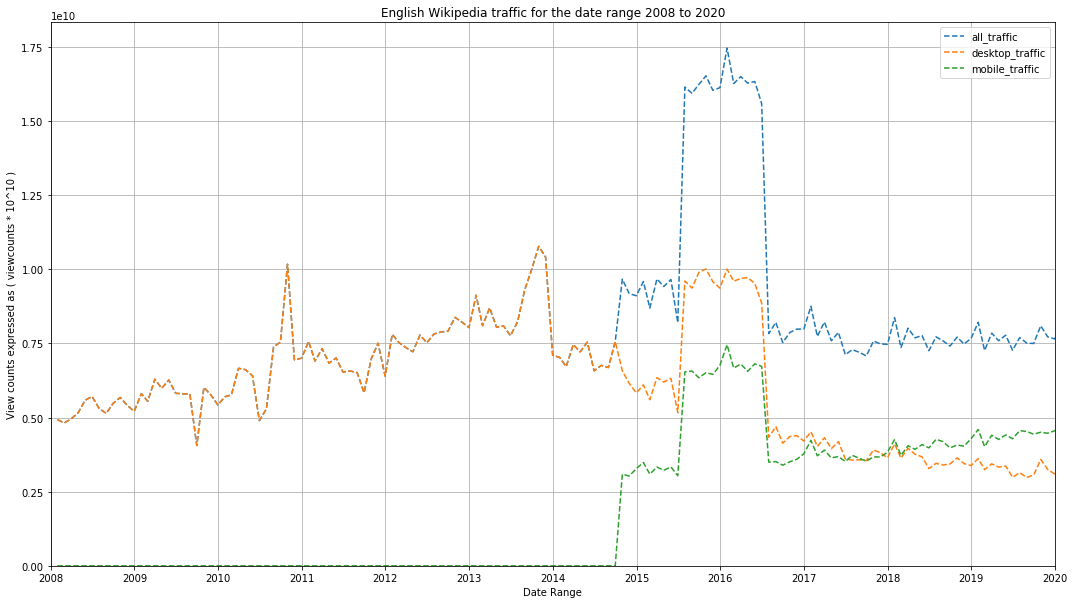

In [9]:
# Make a copy of the dataframe for further analysis
traffic_metric = single_csv.copy()
traffic_metric['all_traffic'] = traffic_metric['pageview_all_views'] + traffic_metric['pagecount_all_views']
traffic_metric['desktop_traffic'] = traffic_metric['pagecount_desktop_views'] + traffic_metric['pageview_desktop_views']
traffic_metric['mobile_traffic'] = traffic_metric['pagecount_mobile_views'] + traffic_metric['pageview_mobile_views']

traffic_all = np.vstack(( traffic_metric['all_traffic'].values, traffic_metric['desktop_traffic'].values, traffic_metric['mobile_traffic'].values)).T

# Create a date range with monthly frequency starting from Jan 2008 to Sep 2020
date_range = pd.date_range(start='2008-01-01', periods =153, freq='M')
traffic_plot = pd.DataFrame(traffic_all, date_range, columns=['all_traffic','desktop_traffic','mobile_traffic'])

# Get every year using the dates library and format it
years = mdates.YearLocator() 
years_fmt = mdates.DateFormatter('%Y')

# Graph style elements
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(18)
ax.plot(traffic_plot,linestyle='--')
ax.grid(True)

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)


# Set the min and max values for X and Y axis
datemin = np.datetime64(date_range[0], 'Y')
datemax = np.datetime64(date_range[-1], 'Y') + np.timedelta64(0, 'Y')
ax.set_xlim(datemin, datemax)
ax.set_ylim(ymin=0)

plt.title('English Wikipedia traffic for the date range 2008 to 2020')
plt.xlabel('Date Range')
plt.ylabel('View counts expressed as ( viewcounts * 10^10 )')
plt.legend(['all_traffic','desktop_traffic','mobile_traffic'])
plt.show()

From the graph, it is very clear that there is a spike in the overall traffic around the year 2016 which could potentially be attributed to deprecating legacy Pagecounts API and introducing the Pageviews API.